<h1 style="text-align:center">Machine Learning - Felix Filipi</h1>
<h2 style="text-align:center">Assignment-9 (DTL)</h2>

<h3>Import Library

In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from IPython.display import Image

<h3>Import Dataset

In [2]:
ds = pd.read_csv('datasets/listings.csv', )
ds

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,49091,COZICOMFORT LONG TERM STAY ROOM 2,266763,Francesca,North Region,Woodlands,1.44255,103.79580,Private room,83,180,1,2013-10-21,0.01,2,365
1,50646,Pleasant Room along Bukit Timah,227796,Sujatha,Central Region,Bukit Timah,1.33235,103.78521,Private room,81,90,18,2014-12-26,0.28,1,365
2,56334,COZICOMFORT,266763,Francesca,North Region,Woodlands,1.44246,103.79667,Private room,69,6,20,2015-10-01,0.20,2,365
3,71609,Ensuite Room (Room 1 & 2) near EXPO,367042,Belinda,East Region,Tampines,1.34541,103.95712,Private room,206,1,14,2019-08-11,0.15,9,353
4,71896,B&B Room 1 near Airport & EXPO,367042,Belinda,East Region,Tampines,1.34567,103.95963,Private room,94,1,22,2019-07-28,0.22,9,355
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7902,38105126,Loft 2 pax near Haw Par / Pasir Panjang. Free ...,278109833,Belle,Central Region,Queenstown,1.27973,103.78751,Entire home/apt,100,3,0,NaN,NaN,31,61
7903,38108273,3bedroom luxury at Orchard,238891646,Neha,Central Region,Tanglin,1.29269,103.82623,Entire home/apt,550,6,0,NaN,NaN,34,365
7904,38109336,[ Farrer Park ] New City Fringe CBD Mins to MRT,281448565,Mindy,Central Region,Kallang,1.31286,103.85996,Private room,58,30,0,NaN,NaN,3,173
7905,38110493,Cheap Master Room in Central of Singapore,243835202,Huang,Central Region,River Valley,1.29543,103.83801,Private room,56,14,0,NaN,NaN,2,30


<h3>Drop Missing Values

In [3]:
ds=ds.dropna()

<h3>Find unique values for label

In [4]:
ds['room_type'].nunique()

3

In [5]:
ds['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

<h3>Determine feature and label

In [6]:
x = ds[['latitude','longitude','price','minimum_nights',
        'number_of_reviews','reviews_per_month',
        'calculated_host_listings_count','availability_365']]

y = ds['room_type']

In [7]:
x.corr()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
latitude,1.000000,-0.033935,-0.090749,0.080977,-0.003216,-0.029692,-0.128869,-0.057701
longitude,-0.033935,1.000000,-0.046635,-0.004709,0.119892,0.117523,0.054626,-0.081065
price,-0.090749,-0.046635,1.000000,-0.039507,-0.033552,0.000874,0.035430,0.016658
minimum_nights,0.080977,-0.004709,-0.039507,1.000000,-0.042062,-0.139525,0.035686,0.090087
number_of_reviews,-0.003216,0.119892,-0.033552,-0.042062,1.000000,0.627946,-0.161322,-0.059224
reviews_per_month,-0.029692,0.117523,0.000874,-0.139525,0.627946,1.000000,-0.196061,-0.108473
calculated_host_listings_count,-0.128869,0.054626,0.035430,0.035686,-0.161322,-0.196061,1.000000,0.238575
availability_365,-0.057701,-0.081065,0.016658,0.090087,-0.059224,-0.108473,0.238575,1.000000


<h3>Encode label

In [8]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y = encoder.fit_transform(y)
y

array([1, 1, 1, ..., 1, 0, 1])

<h3>Normalization

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x = scaler.fit_transform(x)
x

array([[0.95444936, 0.45658692, 0.0083    , ..., 0.        , 0.003663  ,
        1.        ],
       [0.42494715, 0.42418773, 0.0081    , ..., 0.02078522, 0.        ,
        1.        ],
       [0.95401691, 0.45924861, 0.0069    , ..., 0.01462664, 0.003663  ,
        1.        ],
       ...,
       [0.30203729, 0.35391299, 0.0056    , ..., 0.07621247, 0.        ,
        0.32876712],
       [0.27306362, 0.61451386, 0.0237    , ..., 0.07621247, 0.04029304,
        0.43561644],
       [0.71751874, 0.74484489, 0.006     , ..., 0.07621247, 0.        ,
        0.81643836]])

<h3>Cross Validation

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x, y, test_size=0.2, random_state=42)

<h3>Modelling

In [11]:
from sklearn.tree import DecisionTreeClassifier

dtl = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
dtl.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [12]:
prediction = dtl.predict(X_test)
prediction

array([1, 1, 1, ..., 0, 2, 1])

<h3>Evaluate

In [13]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, prediction))

DecisionTrees's Accuracy:  0.8466019417475729


<h3>Visualize Graph

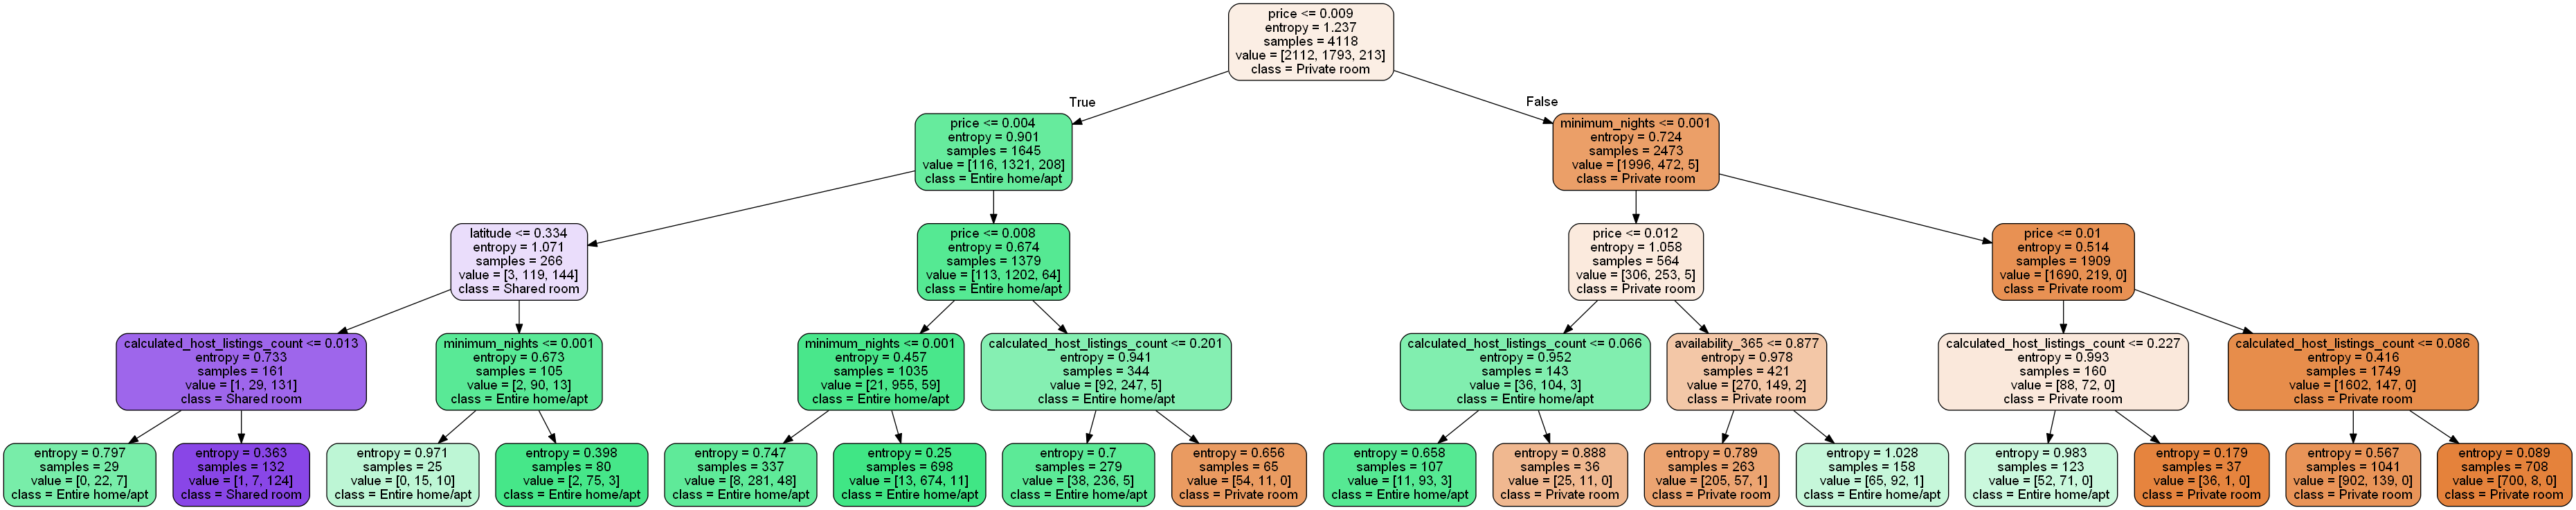

In [14]:
#Viualize dtl process
import pydotplus
import matplotlib.image as mpimg
from sklearn.tree import export_graphviz

dot_file = export_graphviz(dtl, out_file=None,
                           feature_names = ['latitude','longitude','price','minimum_nights',
                                          'number_of_reviews','reviews_per_month',
                                          'calculated_host_listings_count','availability_365'], 
                           class_names = ['Private room', 'Entire home/apt', 'Shared room'],
                           rounded= True,filled =True)

graph = pydotplus.graph_from_dot_data(dot_file) 
Image(graph.create_png())